<a href="https://colab.research.google.com/github/Alialtinel/aalto_summer24_project/blob/main/notebooks/regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

!pip install shap
import shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.5 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
access_token = userdata.get('pat_key')

In [3]:
!git clone https://{acces_token}@github.com/Alialtinel/aalto_summer24_project.git

Cloning into 'aalto_summer24_project'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 111 (delta 37), reused 40 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (111/111), 3.26 MiB | 8.73 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [4]:
%cd aalto_summer24_project

/content/aalto_summer24_project


In [5]:
!git pull

Already up to date.


In [6]:
dir = '/content/aalto_summer24_project/data/filtered_data.csv'
df = pd.read_csv(dir)
df.head()

,LIBGEO,CODGEO,NBMENFISC,NBPERSMENFISC,MED,PIMP,TP60,TP60AGE1,TP60AGE2,TP60AGE3,...,PPSOC,PPFAM,PPMINI,PPLOGT,PIMPOT,D1,D9,RD,lat,lng
0,Paris,001,5064161.67,12386964.00,22911.38,64.53,15.33,19.07,16.30,17.57,...,4.40,1.90,1.37,1.13,-21.93,10580.38,46401.56,4.38,48.8567,2.3522
1,Bordeaux,006,527937.00,1196274.67,21900.44,56.13,12.03,22.30,13.37,13.10,...,4.97,1.83,1.77,1.37,-17.77,11760.29,38424.44,3.28,44.8400,-0.5800
2,Marseille - Aix-en-Provence,003,734905.67,1705454.83,20635.56,53.13,18.63,27.37,21.70,21.97,...,6.57,2.20,2.53,1.80,-18.33,9878.33,38467.78,3.88,NaN,NaN
3,Lyon,002,939886.67,2231507.83,22157.60,58.20,12.87,19.67,14.57,15.00,...,5.17,2.30,1.50,1.33,-18.07,11502.95,40109.42,3.50,45.7600,4.8400
4,Toulouse,004,561315.67,1279804.83,22424.28,57.20,12.47,22.90,13.03,13.33,...,5.23,1.97,1.80,1.47,-18.03,11589.07,39787.93,3.43,43.6045,1.4440


In [7]:
dir = '/content/aalto_summer24_project/data/french_poverty_urban_areas_2015.xlsx'
df_2015 = pd.read_excel(dir)
df_2015.shape

(782, 29)

In [8]:
df_2015.columns

Index(['CODGEO', 'LIBGEO', 'NBMENFISC', 'NBPERSMENFISC', 'MED', 'PIMP', 'TP60',
       'TP60AGE1', 'TP60AGE2', 'TP60AGE3', 'TP60AGE4', 'TP60AGE5', 'TP60AGE6',
       'TP60TOL1', 'TP60TOL2', 'PACT', 'PTSA', 'PCHO', 'PBEN', 'PPEN', 'PPAT',
       'PPSOC', 'PPFAM', 'PPMINI', 'PPLOGT', 'PIMPOT', 'D1', 'D9', 'RD'],
      dtype='object')

In [9]:
X_columns = [ 'NBMENFISC', 'NBPERSMENFISC', 'MED', 'PIMP', 'TP60',
       'TP60AGE1', 'TP60AGE2', 'TP60AGE3', 'TP60AGE4', 'TP60AGE5', 'TP60AGE6',
       'TP60TOL1', 'TP60TOL2', 'PACT', 'PTSA', 'PCHO', 'PBEN', 'PPEN', 'PPAT',
       'PPSOC', 'PPFAM', 'PPMINI', 'PPLOGT', 'PIMPOT']

In [10]:
rows_before = df_2015.shape[0]
df_2015.dropna(subset=['RD'], inplace=True)
rows_after = df_2015.shape[0]
print("Number of rows dropped:", rows_before - rows_after)


Number of rows dropped: 1


In [11]:
# Assuming 'RD' is the target variable and the rest are features
X = df_2015[X_columns]
y = df_2015['RD']

In [12]:
X = X.fillna(X.mean())

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
k = 15  # Example: Select top 5 features
selector = RFE(model, n_features_to_select=k)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
model.fit(X_train[selected_features], y_train)


LinearRegression()

In [15]:
y_train_pred = model.predict(X_train[selected_features])
y_test_pred = model.predict(X_test[selected_features])


In [16]:
# R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Mean Absolute Percentage Error (MAPE)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train R2: 0.7999999039288095
Test R2: 0.8312073459826472
Train MAPE: 0.034389432001040686
Test MAPE: 0.03663606195223779
Train MAE: 0.10874855306281066
Test MAE: 0.11360955008471604
Train MSE: 0.03176643916290555
Test MSE: 0.022106508988172097


In [17]:
dir = '/content/aalto_summer24_project/data/french_poverty_urban_areas_column_mapping.xlsx'
df_mapping = pd.read_excel(dir)

# Get the coefficients
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
})


merged_df = pd.merge(coefficients, df_mapping, left_on='Feature', right_on='column code', how='left')

merged_df['Coefficient'] = merged_df['Coefficient'].round(2)
merged_df

,Feature,Coefficient,column name,column code
0,TP60,8.000000e-02,Overall Poverty Rate,TP60
1,TP60AGE3,-0.000000e+00,Poverty Rate - 40 to 49 Years,TP60AGE3
2,TP60AGE6,1.000000e-02,Poverty Rate - 75 Years or Older,TP60AGE6
3,TP60TOL1,-1.000000e-02,Poverty Rate - Homeowners,TP60TOL1
4,PACT,-1.168877e+11,Percentage of Income from Work,PACT
5,PTSA,-4.000000e-02,Percentage from Salaries and Wages,PTSA
6,PCHO,-5.000000e-02,Percentage from Unemployment Benefits,PCHO
7,PBEN,-6.000000e-02,Percentage from Non-Salaried Work Income,PBEN
8,PPEN,-1.168877e+11,"Percentage from Pensions, Retirement and Annui...",PPEN
9,PPAT,-1.168877e+11,Percentage from Property and Other Sources,PPAT


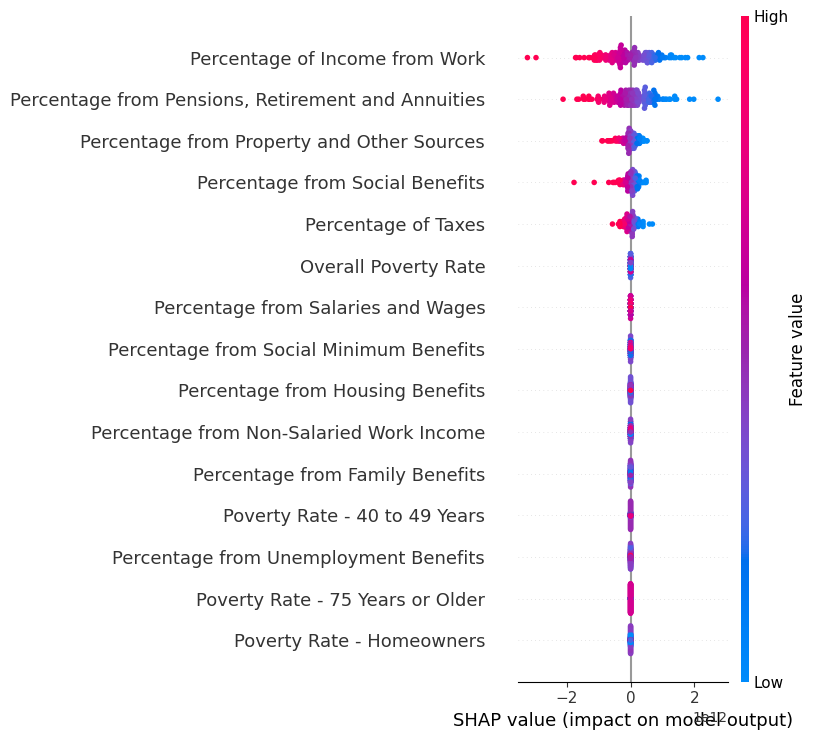

<Figure size 640x480 with 0 Axes>

In [18]:
# Create a SHAP explainer
import matplotlib.pyplot as plt
explainer = shap.Explainer(model, X_train[selected_features], feature_names=merged_df['column name'].tolist())

# Calculate SHAP values for the test set
shap_values = explainer(X_test[selected_features])

# Summary plot with feature names
shap.summary_plot(shap_values, X_test[selected_features], feature_names=merged_df['column name'].tolist())
plt.savefig('/content/aalto_summer24_project/visualizations/shap_summary_plot.png')


In [ ]:
# Add the file to the Git repository
!git add .

# Commit the changes
!git commit -m "corrected regression analysis"

# Push the changes to the remote repository
!git push origin main


[main 4944518] added shap analysis
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 visualizations/shap_summary_plot.png
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 572 bytes | 572.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/Alialtinel/aalto_summer24_project.git
   ed4b170..4944518  main -> main
